<a href="https://colab.research.google.com/github/majevonrick/Data-Science-projects/blob/main/Flower%20type%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The term "target" is typically the goal we are trying to model. The key "target_names" indicates 3 species of this flower, "setosa", "versicolor", and "virginica".

In [29]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.size'] = 15

In [30]:
# import dataset
iris = datasets.load_iris()

In [31]:
#print data
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [32]:
#create the DataFrame with feature names
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [33]:
# flower species are the target
target = pd.DataFrame(data=iris.target, columns=['species'])

# unite both DF with concat; add a new column
data = pd.concat([data, target], axis=1)

# mix in random
data = data.sample(frac=1, random_state=1234)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


# Training and testing

In [45]:
# training is set to 80%
Ntrain = int(data.shape[0] * 0.8)

#training data
train = data.iloc[:Ntrain, :]

test = data.iloc[Ntrain:, :]

# Linear Regression

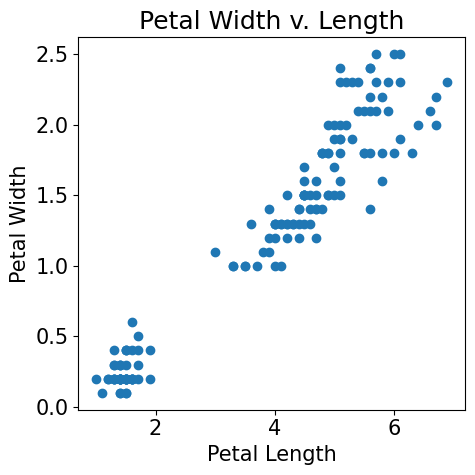

In [46]:
# defining variables
plength =data["petal length (cm)"]
pwidth = data["petal width (cm)"]

#graph comparing etal length and Petal width
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Width v. Length")
f.tight_layout()

In [47]:
model_1 = linear_model.LinearRegression()

#adjust the model with the data
model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])

#print the coefficients
print("Coef\n", model_1.coef_)

# print the bias
print("\n\nBias\n", model_1.intercept_)

Coef
 [0.41490802]


Bias
 -0.357589314248546


Thats tell us that $\theta_1$ is 0.41 (petal length), and bias is -0.36.

$\theta_1 * x + \theta_0 = 0.41*x - 0.36 = y$ <br>

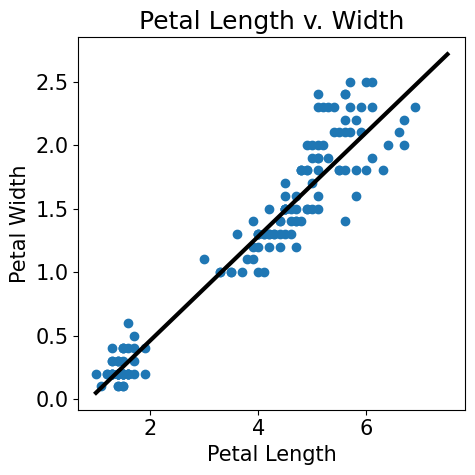

In [48]:
#defining the variables
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

#from the minimum value to max of petal length +1, in 0.5 steps
xvals = np.arange(plength.min(), plength.max() +1, 0.5)
yvals = 0.41*xvals - 0.36

#graph
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=3)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()

There is a good graph. Now we need metrics of performance. MSE and $R^2$

In [19]:
# prediction with model_1 = linear_model.LinearRegression()

In [49]:

# Predicción con model_1 = linear_model.LinearRegression() utilizando los datos de prueba.
ypredict = model_1.predict(pd.DataFrame(test.iloc[:, 2]))

# Calculamos el MSE con los valores predichos en y.
print('MSE: %.2f'
      % mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict))

# Calculamos R^2 con los valores predichos en y.
print('R2: %.2f'
      % r2_score(pd.DataFrame(test.iloc[:, 3]), ypredict))

MSE: 0.04
R2: 0.94


# Logistic Regression

Using width and length of flower petals we would like to classify them into species

In [52]:
xtrain = train.iloc[:, :-1]
ytrain = train.iloc[:, -1]
xtest = test.iloc[: ,:-1]
ytest = test.iloc[:, -1]

model_2 = linear_model.LogisticRegression()

model_2.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# making predictions
ypred = model_2.predict(xtest)
print("Testing accuracy=", accuracy_score(ytest, ypred))

Testing accuracy= 1.0


### Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]])

# Random Forest

In [55]:
# Creamos el clasificador
clf = RandomForestClassifier(n_estimators=3)

# Entrenamos el modelo
clf.fit(xtrain, ytrain)

# Generamos predicción
y_pred=clf.predict(xtest)

# Probamos el modelo con accuracy
print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0
